In [2]:
# 导入数据并查看
import pandas as pd
file = r'D:\Programing\python_projects\data_analysis\data_set\marathon.csv'
marathon = pd.read_csv(file)
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [3]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     37250 non-null  int64 
 1   gender  37250 non-null  object
 2   split   37250 non-null  object
 3   final   37250 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
# 数据清洗
import datetime


def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [5]:
marathon = pd.read_csv(file,
                       converters={
                           'split': convert_time,
                           'final': convert_time
                       })
marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [6]:
# 将后两特征值转化为秒为单位的整数
marathon['split_sec'] = marathon['split'].dt.total_seconds()
marathon['final_sec'] = marathon['final'].dt.total_seconds()
marathon.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [7]:
marathon.describe()

,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


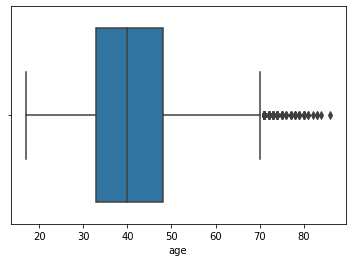

In [8]:
# 查看数据分布
%matplotlib inline
import seaborn as sns
ax = sns.boxplot(x=marathon['age'])

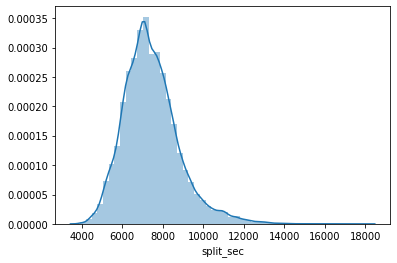

In [9]:
sns.distplot(marathon['split_sec'])

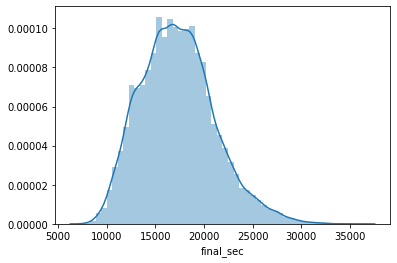

In [10]:
sns.distplot(marathon['final_sec'])

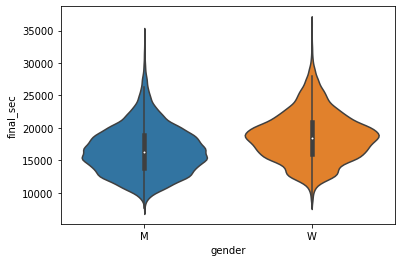

In [11]:
sns.violinplot(x='gender', y='final_sec', data=marathon)

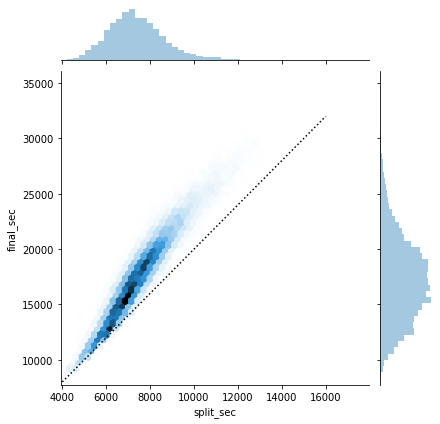

In [12]:
# 为什么跑得快
g = sns.jointplot(x='split_sec', y='final_sec', data=marathon, kind='hex')
# 绘制一条直线，作为参考
import numpy as np
g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [13]:
# 半程与全程的比较
marathon['split_frac'] = 1 - 2 * marathon['split_sec'] / marathon['final_sec']
marathon.head()
# 值越小，跑得越均速，负值越跑越快

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


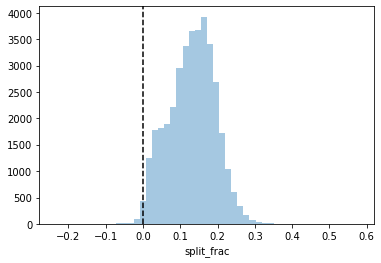

In [14]:
import matplotlib.pyplot as plt
sns.distplot(marathon['split_frac'], kde=False)
# 垂直于X轴的直线，0表示X轴位置
plt.axvline(0, color='k', linestyle='--')

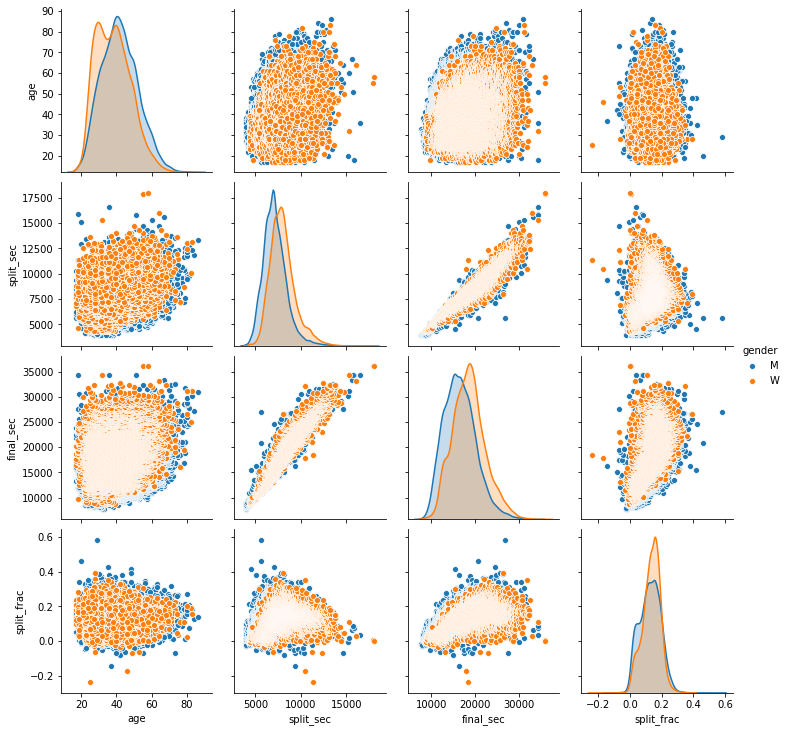

In [15]:
sns.pairplot(data=marathon,
             vars=['age', 'split_sec', 'final_sec', 'split_frac'],
             hue='gender')

In [16]:
# 年龄分布
(marathon.age >= 80).sum()

15

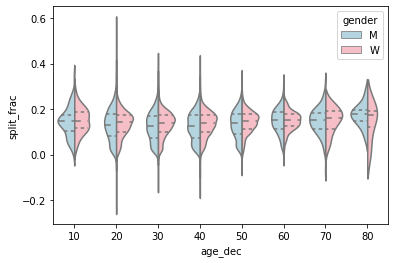

In [17]:
marathon['age_dec'] = marathon['age'].map(lambda age: 10 * (age // 10))
sns.violinplot(x='age_dec',
               y='split_frac',
               hue='gender',
               data=marathon,
               split=True,
               inner='quartile',
               palette=['lightblue', 'lightpink'])

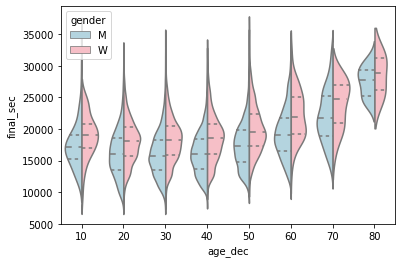

In [18]:
sns.violinplot(x='age_dec',
               y='final_sec',
               hue='gender',
               data=marathon,
               split=True,
               inner='quartile',
               palette=['lightblue', 'lightpink'])